In [1]:
import os

current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /content


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/NLP_Assignment5")

Mounted at /content/gdrive


# Loading the Data

loading the updated json file containing manually tagged tweets

In [3]:
import json
import os

# Assuming the file is in the same directory as the script
file_path = "assignment5_data.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# STEP 1

importing necessary libraries

In [4]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch

from transformers import BertTokenizerFast, BertModel
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from transformers import BertTokenizerFast
from collections import Counter
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader

viewing the data type of json

In [5]:
# Print the type of 'data' to understand its structure
print(f"Type of data: {type(data)}")

# If it's a dictionary, print its keys to explore further
if isinstance(data, dict):
    print(f"Keys in data: {data.keys()}")

Type of data: <class 'dict'>
Keys in data: dict_keys(['annotations'])


viewing the sample structure of a NER tagged tweet

In [6]:
with open('assignment5_data.json', 'r') as f:
    # Read the first 1000 characters to inspect the structure
    print(f.read(700))

{
    "annotations": [
        [
            "Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions .\t\r",
            {
                "entities": [
                    [
                        0,
                        10,
                        "ORG"
                    ],
                    [
                        59,
                        66,
                        "DATE"
                    ],
                    [
                        103,
                        111,
                        "DATE"
                    ]
                ]
            }
        ],
        [
   


In [7]:
with open('assignment5_data.json', 'r') as f:
    data = json.load(f)

# Print the keys to see the structure
print(f"Keys in the data: {list(data.keys())}")

# If 'annotations' exists, print a sample of the annotations
if 'annotations' in data:
    print(f"First 3 annotations: {data['annotations'][:3]}")


Keys in the data: ['annotations']
First 3 annotations: [['Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions .\t\r', {'entities': [[0, 10, 'ORG'], [59, 66, 'DATE'], [103, 111, 'DATE']]}], ['Air France says it plans to operate all long-haul flights from Paris and 90 percent of its short and medium-haul routes .\t\r', {'entities': [[0, 10, 'ORG'], [63, 68, 'GPE']]}], ['Labor unions representing cabin crews voted Monday to end the walkout .\t\r', {'entities': [[0, 12, 'ORG'], [44, 50, 'DATE']]}]]


In [8]:
annotations = data.get('annotations', [])  # Default to empty list if key doesn't exist

print(f"Number of annotations: {len(annotations)}")
print(f"First annotation: {annotations[0]}")


Number of annotations: 11084
First annotation: ['Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions .\t\r', {'entities': [[0, 10, 'ORG'], [59, 66, 'DATE'], [103, 111, 'DATE']]}]


In [9]:
# Inspect the first few items in the 'annotations' key
annotations = data['annotations']

# Print the type of 'annotations' to ensure it's a list
print(f"Type of annotations: {type(annotations)}")

# Check the structure of the first entry in annotations
print(f"First item in annotations: {annotations[0]}")

Type of annotations: <class 'list'>
First item in annotations: ['Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions .\t\r', {'entities': [[0, 10, 'ORG'], [59, 66, 'DATE'], [103, 111, 'DATE']]}]


Visualization of the total number of instances for each category

I have made changes to the json file, as the file contains some outliers, such as "PERSON " & "NORP ", which I have replaced with "PERSON" & "NORP" respectively.

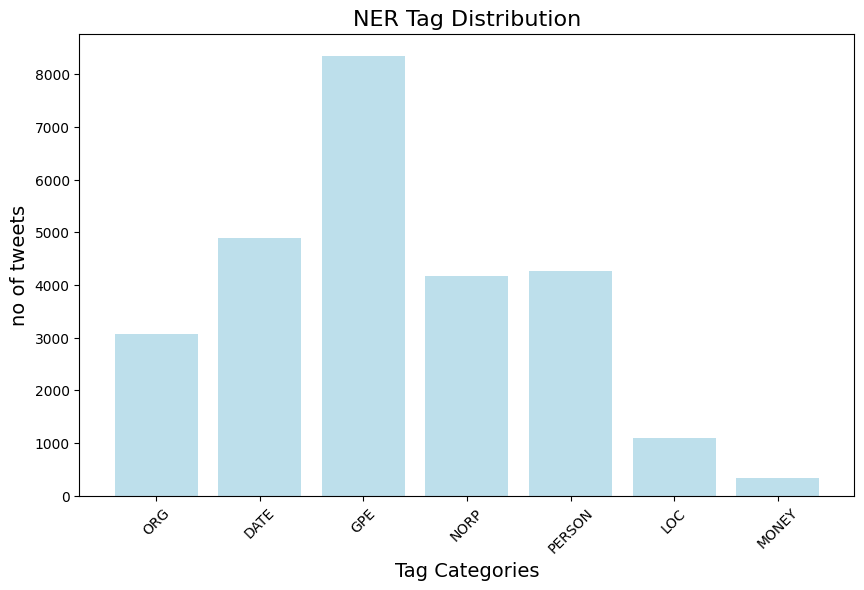

In [10]:
annotations_data = data['annotations']

# Count the number of instances for each tag category
tag_frequencies = {}

# Loop through annotations to count tags
for item in annotations_data:
    tweet_info = item[1]  # Extract the second element (tweet info)
    if 'entities' in tweet_info and tweet_info['entities']:  # Check if entities exist
        for entity in tweet_info['entities']:
            tag = entity[2]  # Get the tag
            if tag in tag_frequencies:
                tag_frequencies[tag] += 1
            else:
                tag_frequencies[tag] = 1


# Plot the tag frequencies with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(tag_frequencies.keys(), tag_frequencies.values(), color='lightblue', alpha=0.8)
plt.xlabel('Tag Categories', fontsize=14)
plt.ylabel('no of tweets', fontsize=14)
plt.title('NER Tag Distribution', fontsize=16)
plt.xticks(rotation=45)
plt.show()


Distribution of each tag in total tweets

In [11]:
# Initialize counters for analysis
tweets_with_tags_count = 0
tweets_with_multiple_tags_count = 0
tag_frequencies = Counter()

# Loop through annotations to analyze tag occurrences
for _, tweet_info in annotations_data:
    entities = tweet_info.get('entities', [])
    if len(entities) > 0:
        tweets_with_tags_count += 1
    if len(entities) > 1:
        tweets_with_multiple_tags_count += 1
    # Count individual tags
    for _, _, tag in entities:
        tag_frequencies[tag] += 1

# Calculate percentages for tweets with tags
total_tweets_count = len(annotations_data)
percentage_with_tags = (tweets_with_tags_count / total_tweets_count) * 100
percentage_with_multiple_tags = (tweets_with_multiple_tags_count / total_tweets_count) * 100

# Calculate the total number of tags for percentages
total_tag_count = sum(tag_frequencies.values())
tag_percentages = {tag: (count / total_tag_count) * 100 for tag, count in tag_frequencies.items()}

# Print the analysis results
print("Total number of tweets:", total_tweets_count)
print("-----------------------------------------------")
print("\nTag-wise Percentages:")
for tag, percentage in tag_percentages.items():
    print(f"{tag}: {percentage:.2f}%")
print("-----------------------------------------------")
print(f"\nPercentage of tweets having at least one tag: {percentage_with_tags:.2f}%")
print(f"Percentage of tweets having two or more tags: {percentage_with_multiple_tags:.2f}%")

Total number of tweets: 11084
-----------------------------------------------

Tag-wise Percentages:
ORG: 11.72%
DATE: 18.69%
GPE: 31.92%
NORP: 15.93%
PERSON: 16.33%
LOC: 4.16%
MONEY: 1.26%
-----------------------------------------------

Percentage of tweets having at least one tag: 86.73%
Percentage of tweets having two or more tags: 66.79%


Visualization to display the distribution of no of tags per tweet

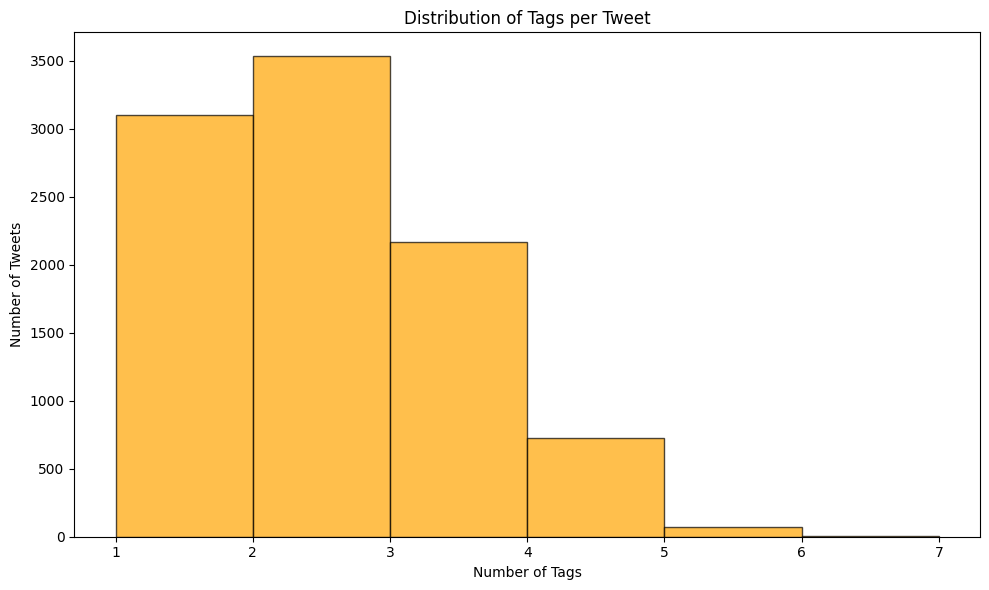

In [12]:
# List to store the number of unique tags per tweet
tags_per_tweet = []

# Iterate through each annotation and count the number of distinct tags
for annotation in annotations:
    entities = annotation[1].get('entities', [])
    unique_tags = set(entity[2] for entity in entities)  # Get unique tags for this tweet
    tags_per_tweet.append(len(unique_tags))  # Count the number of unique tags

# Plot the distribution of the number of tags per tweet
plt.figure(figsize=(10, 6))
plt.hist(tags_per_tweet, bins=range(1, 8), color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Tags per Tweet")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Tweets")
plt.xticks(range(1, 8))
plt.tight_layout()
plt.show()

# STEP 2: Converting input tags to IOB Tags

In [13]:
# Initialize BERT tokenizer
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-cased")

def function1(text, spans):
    """
    Convert NER tags (character spans) to IOB format using BERT tokenizer.

    Args:
        text (str): Input text (e.g., a tweet).
        spans (list): List of character-span tags [(start, end, tag)].

    Returns:
        token_list (list): Tokens from BERT tokenizer.
        iob_tags_list (list): IOB tags corresponding to tokens.
    """
    # Tokenize the text and get offsets
    tokenized_data = bert_tokenizer(text, return_offsets_mapping=True, truncation=True)
    token_list = tokenized_data.tokens()
    offsets = tokenized_data.offset_mapping

    # Initialize all tags as 'O' by default
    iob_tags_list = ['O'] * len(token_list)

    # Assign 'O' to [CLS] and [SEP] explicitly
    for idx, token in enumerate(token_list):
        if token in ["[CLS]", "[SEP]"]:
            iob_tags_list[idx] = 'O'

    # Sort spans by length (longest first)
    sorted_spans = sorted(spans, key=lambda span: span[1] - span[0], reverse=True)

    # Assign IOB tags for tokens
    for start_char, end_char, tag in sorted_spans:
        for idx, (token_start, token_end) in enumerate(offsets):
            # Skip special tokens
            if token_start is None or token_end is None:
                continue

            # Check if the token overlaps with the span
            if token_start < end_char and token_end > start_char:
                if iob_tags_list[idx] == 'O':  # Update only if not already tagged
                    if token_start == start_char:
                        iob_tags_list[idx] = f"B-{tag}"  # Beginning of a span
                    else:
                        iob_tags_list[idx] = f"I-{tag}"  # Inside the span

    return token_list, iob_tags_list

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
tweet_text = [("Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions.",
    [(0, 10, "ORG"),  # 'Air France' as ORG
    (59, 66, "DATE"), # 'Tuesday' as DATE
    (103, 111, "DATE") # 'five-day' as DATE
])]

for i, (doc, entities) in enumerate(tweet_text):
  tokens, iob_tags = function1(doc, entities)
  print(f"Tweet: {doc}")
  print("-------------------------------------------------------")
  print(f"NER entity: {entities}")
  print("-------------------------------------------------------")
  print(f"Tokens: {tokens}")
  print("-------------------------------------------------------")
  print(f"IOB Tags: {iob_tags}\n")

Tweet: Air France says its flight schedule is returning to normal Tuesday after flight staff called off their five-day strike over pay and working conditions.
-------------------------------------------------------
NER entity: [(0, 10, 'ORG'), (59, 66, 'DATE'), (103, 111, 'DATE')]
-------------------------------------------------------
Tokens: ['[CLS]', 'Air', 'France', 'says', 'its', 'flight', 'schedule', 'is', 'returning', 'to', 'normal', 'Tuesday', 'after', 'flight', 'staff', 'called', 'off', 'their', 'five', '-', 'day', 'strike', 'over', 'pay', 'and', 'working', 'conditions', '.', '[SEP]']
-------------------------------------------------------
IOB Tags: ['O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']



In [15]:
correct_label_order = [
    "O",
    "B-PERSON", "I-PERSON",
    "B-NORP", "I-NORP",
    "B-ORG", "I-ORG",
    "B-GPE", "I-GPE",
    "B-LOC", "I-LOC",
    "B-DATE", "I-DATE",
    "B-MONEY", "I-MONEY"

]
label_map = {label: idx for idx, label in enumerate(correct_label_order)}
id2label = {idx: label for label, idx in label_map.items()}
print("Corrected Label Map:", label_map)
print("-------------------------------------------------------")
print(f'Total Tags : {len(label_map)}')
print("-------------------------------------------------------")
print("Corrected id2label:", id2label)

Corrected Label Map: {'O': 0, 'B-PERSON': 1, 'I-PERSON': 2, 'B-NORP': 3, 'I-NORP': 4, 'B-ORG': 5, 'I-ORG': 6, 'B-GPE': 7, 'I-GPE': 8, 'B-LOC': 9, 'I-LOC': 10, 'B-DATE': 11, 'I-DATE': 12, 'B-MONEY': 13, 'I-MONEY': 14}
-------------------------------------------------------
Total Tags : 15
-------------------------------------------------------
Corrected id2label: {0: 'O', 1: 'B-PERSON', 2: 'I-PERSON', 3: 'B-NORP', 4: 'I-NORP', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-GPE', 8: 'I-GPE', 9: 'B-LOC', 10: 'I-LOC', 11: 'B-DATE', 12: 'I-DATE', 13: 'B-MONEY', 14: 'I-MONEY'}


# STEP 3: Finetuning BERT

## Splitting the Data

In [16]:
print("DATA SPLITTING")
print("--------------------------------")
train_data, test_data = train_test_split(annotations_data, test_size=0.2, random_state=21)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=21)

print(f"Training samples: {len(train_data)} || Validation samples: {len(val_data)} || Test samples: {len(test_data)}")

DATA SPLITTING
--------------------------------
Training samples: 7093 || Validation samples: 1774 || Test samples: 2217


In [17]:
# Extract unique tags directly from the pre-defined label_map
unique_tags = list(label_map.keys())  # Use the existing tag definitions
tag2id = label_map  # Your manually defined mapping remains unchanged
id2tag = id2label  # Your manually defined reverse mapping remains unchanged

print("\nUnique Tags:", unique_tags)
print("--------------------------------")
print("Tag-to-ID mapping:", tag2id)
print("--------------------------------")
print("ID-to-Tag mapping:", id2tag)


Unique Tags: ['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE', 'B-MONEY', 'I-MONEY']
--------------------------------
Tag-to-ID mapping: {'O': 0, 'B-PERSON': 1, 'I-PERSON': 2, 'B-NORP': 3, 'I-NORP': 4, 'B-ORG': 5, 'I-ORG': 6, 'B-GPE': 7, 'I-GPE': 8, 'B-LOC': 9, 'I-LOC': 10, 'B-DATE': 11, 'I-DATE': 12, 'B-MONEY': 13, 'I-MONEY': 14}
--------------------------------
ID-to-Tag mapping: {0: 'O', 1: 'B-PERSON', 2: 'I-PERSON', 3: 'B-NORP', 4: 'I-NORP', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-GPE', 8: 'I-GPE', 9: 'B-LOC', 10: 'I-LOC', 11: 'B-DATE', 12: 'I-DATE', 13: 'B-MONEY', 14: 'I-MONEY'}


## Funciton to prepare the dataset for model:

In [18]:
#Dataset Prep Class
class prepareDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        doc, ann = self.data[idx]
        tokens, iob_tags = function1(doc, ann['entities'])
        encoded = bert_tokenizer(doc, padding="max_length", max_length=128, truncation=True, return_tensors="pt")
        labels = [tag2id.get(tag, 0) for tag in iob_tags]  # Convert IOB tags to IDs
        labels += [-100] * (128 - len(labels))  # Add ignored tokens for padding
        return {
            'input_ids': encoded['input_ids'].squeeze(),
            'attention_mask': encoded['attention_mask'].squeeze(),
            'labels': torch.tensor(labels)
        }

#Collate Function
def collate_func(batch):
    return {
        'input_ids': torch.stack([item['input_ids'] for item in batch]),
        'attention_mask': torch.stack([item['attention_mask'] for item in batch]),
        'labels': torch.stack([item['labels'] for item in batch])
    }


train_loader = DataLoader(prepareDataset(train_data), batch_size=16, shuffle=True, collate_fn=collate_func)
val_loader = DataLoader(prepareDataset(val_data), batch_size=16, collate_fn=collate_func)

## Sequence labeling head for BERT:

In [19]:
# Custom Model
class SimpleSequenceLabelingModel(nn.Module):
    def __init__(self, model_name, num_classes):
        super(SimpleSequenceLabelingModel, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        for param in self.bert.parameters():
            param.requires_grad = False  # Freeze BERT weights
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = self.dropout(bert_output.last_hidden_state)
        logits = self.classifier(sequence_output)
        return logits

## Fine-tune the parameters in the sequence labeling head for 30 iterations:

In [22]:
print("Training the model")
model = SimpleSequenceLabelingModel("bert-base-cased", num_classes=len(tag2id))
model = model.to('cuda')

# Step 4: Training Setup
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=5e-5, weight_decay=0.01)

loss_function = nn.CrossEntropyLoss(ignore_index=-100)
epochs = 30

# Training Loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for batch in train_loader:
        # Move data to GPU
        input_ids = batch['input_ids'].to('cuda')
        attention_mask = batch['attention_mask'].to('cuda')
        labels = batch['labels'].to('cuda')

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        predictions = model(input_ids=input_ids, attention_mask=attention_mask)

        # Flatten logits and labels for loss calculation
        predictions = predictions.view(-1, len(tag2id))
        labels = labels.view(-1)

        # Compute loss
        loss = loss_function(predictions, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

Training the model
Epoch 1/30, Loss: 1.5226
Epoch 2/30, Loss: 0.8399
Epoch 3/30, Loss: 0.6811
Epoch 4/30, Loss: 0.5872
Epoch 5/30, Loss: 0.5229
Epoch 6/30, Loss: 0.4759
Epoch 7/30, Loss: 0.4404
Epoch 8/30, Loss: 0.4123
Epoch 9/30, Loss: 0.3922
Epoch 10/30, Loss: 0.3747
Epoch 11/30, Loss: 0.3615
Epoch 12/30, Loss: 0.3499
Epoch 13/30, Loss: 0.3414
Epoch 14/30, Loss: 0.3349
Epoch 15/30, Loss: 0.3285
Epoch 16/30, Loss: 0.3238
Epoch 17/30, Loss: 0.3186
Epoch 18/30, Loss: 0.3146
Epoch 19/30, Loss: 0.3107
Epoch 20/30, Loss: 0.3083
Epoch 21/30, Loss: 0.3061
Epoch 22/30, Loss: 0.3033
Epoch 23/30, Loss: 0.3002
Epoch 24/30, Loss: 0.2993
Epoch 25/30, Loss: 0.2969
Epoch 26/30, Loss: 0.2968
Epoch 27/30, Loss: 0.2951
Epoch 28/30, Loss: 0.2931
Epoch 29/30, Loss: 0.2913
Epoch 30/30, Loss: 0.2907


## Evaluate model on validation dataset

In [23]:
# Inspect model parameters and sizes
for name, param in model.named_parameters():
    print(f"Parameter name: {name} - Shape: {param.shape}")

Parameter name: bert.embeddings.word_embeddings.weight - Shape: torch.Size([28996, 768])
Parameter name: bert.embeddings.position_embeddings.weight - Shape: torch.Size([512, 768])
Parameter name: bert.embeddings.token_type_embeddings.weight - Shape: torch.Size([2, 768])
Parameter name: bert.embeddings.LayerNorm.weight - Shape: torch.Size([768])
Parameter name: bert.embeddings.LayerNorm.bias - Shape: torch.Size([768])
Parameter name: bert.encoder.layer.0.attention.self.query.weight - Shape: torch.Size([768, 768])
Parameter name: bert.encoder.layer.0.attention.self.query.bias - Shape: torch.Size([768])
Parameter name: bert.encoder.layer.0.attention.self.key.weight - Shape: torch.Size([768, 768])
Parameter name: bert.encoder.layer.0.attention.self.key.bias - Shape: torch.Size([768])
Parameter name: bert.encoder.layer.0.attention.self.value.weight - Shape: torch.Size([768, 768])
Parameter name: bert.encoder.layer.0.attention.self.value.bias - Shape: torch.Size([768])
Parameter name: bert.e

In [24]:
# Validation Metrics
print("Evaluating on validation data")
print("-------------------------------------------------------")
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to('cuda')
        attention_mask = batch['attention_mask'].to('cuda')
        labels = batch['labels'].to('cuda')

        predictions = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(predictions, dim=-1)

        # Collect predictions and labels for valid tokens (ignore padding and special tokens)
        for pred, label in zip(predictions.view(-1), labels.view(-1)):
            if label != -100:
                all_preds.append(pred.item())
                all_labels.append(label.item())

# Report Metrics
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=list(tag2id.keys())))

Evaluating on validation data
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           O       0.96      0.98      0.97     39720
    B-PERSON       0.74      0.59      0.66       592
    I-PERSON       0.86      0.88      0.87      1880
      B-NORP       0.71      0.73      0.72       647
      I-NORP       0.72      0.24      0.36       335
       B-ORG       0.60      0.42      0.49       491
       I-ORG       0.70      0.54      0.61      1106
       B-GPE       0.74      0.90      0.81      1275
       I-GPE       0.68      0.69      0.68      1029
       B-LOC       0.45      0.15      0.22       175
       I-LOC       0.38      0.18      0.24       324
      B-DATE       0.78      0.75      0.77       725
      I-DATE       0.66      0.48      0.56       470
     B-MONEY       0.75      0.54      0.63        39
     I-MONEY       0.78      0.47      0.58       107

    accuracy             

#STEP 4: Converting IOB to plain tags

Preparing Tags for Reconciliation

In [25]:
# Utility to move batch data to the device
def transfer_to_device(batch, device):
    """
    Move batch data to the specified device.
    """
    return {key: value.to(device) for key, value in batch.items()}

# Simplify Tags: Convert I- tags to B- tags
def simplify_tags(tags):
    """
    Convert I- tags to B- tags in the tag list.
    Args: tags (list of int): List of IOB tags.
    Returns:list of int: List with I- tags replaced by B- tags.
    """
    return [tag - 1 if tag != 0 and tag % 2 == 0 else tag for tag in tags]

Reconcile Subword Tokens Using Majority Voting

In [32]:
from collections import Counter

def reconcile_tags_majority(tokens, tags):
    """
    Combine subwords into full words and assign tags based on majority voting.
    If there is a tie in voting, the tag of the first token in the span is used.
    """
    word_list = []
    word = []
    tag_votes = Counter()

    for token, tag in zip(tokens, tags):
        if token.startswith("##"):
            # Append the subword to the current word and add the tag to the vote counter
            word.append(token[2:])  # Removing the '##' prefix
            tag_votes[tag] += 1
        else:
            # If the word list is not empty, assign the most common tag to the word
            if word:
                most_common_tag = tag_votes.most_common(1)[0][0]
                word_list.append((''.join(word), most_common_tag))
            # Start a new word with the current token
            word = [token]
            tag_votes = Counter({tag: 1})  # Initialize a new tag vote counter for the new word

    # Append the last word if it exists
    if word:
        most_common_tag = tag_votes.most_common(1)[0][0]
        word_list.append((''.join(word), most_common_tag))

    return word_list


Reconcile Subword Tokens Using First Tag of Span

In [33]:
def reconcile_tags_first(tokens, tags):
    """
    Combine subwords into full words and assign the first tag in the span.
    """
    word_list = []
    word = []
    first_tag = None

    for token, tag in zip(tokens, tags):
        if token.startswith("##"):
            # Append subword to the current word
            word.append(token[2:])
        else:
            # If there's an existing word, add it to the word list with the first tag
            if word:
                word_list.append((''.join(word), first_tag))
            # Start a new word with the current token
            word = [token]
            first_tag = tag

    # Append the last word if any
    if word:
        word_list.append((''.join(word), first_tag))

    return word_list


In [34]:
# Inference and Reconciliation
def run_inference_and_reconcile(reconciliation_fn, method_name, test_loader, model, bert_tokenizer):
    """
    Run inference on the test data and reconcile tags using the specified method.
    """
    print(f"Running inference and reconciliation using {method_name}...")
    true_tags = []
    predicted_tags = []

    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            batch = transfer_to_device(batch, 'cuda')

            outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
            predictions = torch.argmax(outputs, dim=-1)

            for idx in range(len(batch['input_ids'])):
                tokens = bert_tokenizer.convert_ids_to_tokens(batch['input_ids'][idx].tolist())
                true_iob_tags = simplify_tags(batch['labels'][idx].tolist())
                predicted_iob_tags = simplify_tags(predictions[idx].tolist())

                # Filter out -101 from both true and predicted tags
                filtered_tokens, filtered_true_tags, filtered_pred_tags = [], [], []
                for token, true_tag, pred_tag in zip(tokens, true_iob_tags, predicted_iob_tags):
                    if true_tag != -101 and pred_tag != -101:  # Ignore padding
                        filtered_tokens.append(token)
                        filtered_true_tags.append(true_tag)
                        filtered_pred_tags.append(pred_tag)

                reconciled_true = reconciliation_fn(filtered_tokens, filtered_true_tags)
                reconciled_pred = reconciliation_fn(filtered_tokens, filtered_pred_tags)

                # Extract word-level tags
                true_tags.extend([tag for _, tag in reconciled_true])
                predicted_tags.extend([tag for _, tag in reconciled_pred])

    return {"true": true_tags, "predicted": predicted_tags}


# Generate Classification Report
def generate_evaluation_report(results, method_name, id2tag):
    """
    Generate and display a classification report for the given reconciliation results.
    """
    # Get valid labels (ignoring -101)
    unique_labels = sorted(set(results["true"]) | set(results["predicted"]))
    target_names = [id2tag[label] for label in unique_labels if label in id2tag]

    print(f"\n{method_name} Reconciliation Results:")
    print(classification_report(
        results["true"],
        results["predicted"],
        labels=unique_labels,
        target_names=target_names,
        zero_division=0
    ))

In [35]:
# Step 1: Ensure the test dataset is prepared
test_loader = DataLoader(
    prepareDataset(test_data),  # Use your test data split
    batch_size=16,  # Adjust as necessary
    collate_fn=collate_func  # Use the existing collate function
)

# Step 2: Run Majority Voting Reconciliation
majority_results = run_inference_and_reconcile(
    reconciliation_fn=reconcile_tags_majority,
    method_name="Majority Voting",
    test_loader=test_loader,  # Pass the test loader here
    model=model,  # Pass the trained model
    bert_tokenizer=bert_tokenizer  # Pass the tokenizer used
)

# Step 3: Generate Evaluation Report
generate_evaluation_report(majority_results, "Majority Voting", id2tag)

# Step 4: Run First-Tag Reconciliation
first_tag_results = run_inference_and_reconcile(
    reconciliation_fn=reconcile_tags_first,
    method_name="First Tag",
    test_loader=test_loader,  # Reuse the test loader
    model=model,  # Trained model
    bert_tokenizer=bert_tokenizer  # Tokenizer
)

# Step 5: Generate Evaluation Report
generate_evaluation_report(first_tag_results, "First Tag", id2tag)

Running inference and reconciliation using Majority Voting...

Majority Voting Reconciliation Results:
              precision    recall  f1-score   support

           O       0.96      0.98      0.97     47135
    B-PERSON       0.91      0.80      0.85      1828
      B-NORP       0.75      0.64      0.69      1064
       B-ORG       0.69      0.52      0.59      1364
       B-GPE       0.80      0.88      0.84      2482
       B-LOC       0.35      0.16      0.22       363
      B-DATE       0.83      0.72      0.77      1499
     B-MONEY       0.93      0.58      0.72       210

    accuracy                           0.94     55945
   macro avg       0.78      0.66      0.71     55945
weighted avg       0.94      0.94      0.94     55945

Running inference and reconciliation using First Tag...

First Tag Reconciliation Results:
              precision    recall  f1-score   support

           O       0.96      0.98      0.97     47135
    B-PERSON       0.91      0.80      0.85   

In [36]:
# Checking the size of the classification head's weight matrix
print("Weight Matrix Size:", model.classifier.weight.size())

Weight Matrix Size: torch.Size([15, 768])


In [37]:
# Specify the file path to save the model
model_save_path = "simple_sequence_labeling_model.pth"

# Save the model state dictionary (recommended way)
torch.save(model.state_dict(), model_save_path)

print(f"Model saved successfully at {model_save_path}")

Model saved successfully at simple_sequence_labeling_model.pth


Saving the model

In [38]:
torch.save(model, "Final_model.pth")